In [1]:
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
import matplotlib.pyplot as plt


/Users/akhiljalan/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# fix random seed for reproducibility
np.random.seed()

m = 1 # dimension
k_squared = 0.1
m_inv = 1.0
learning_rate = 0.0001
epochs = 1000
batch_size = 1

x_train = np.zeros((epochs,1))
for i in range(0,epochs):
    x_train[i]=np.random.normal()

In [2]:
# declare the training data placeholders
# input x - just one is x0
x0 = tf.placeholder(tf.float32, [None, 1])
# x1 = tf.placeholder(tf.float32, [None, 1])
# x1_noise = tf.placeholder(tf.float32, [None, 1])
# x2 = tf.placeholder(tf.float32, [None, 1])
# # now declare the output data placeholder
# u1 = tf.placeholder(tf.float32, [None, 1])
# u2 = tf.placeholder(tf.float32, [None, 1])

# y = tf.placeholder(tf.float32, [None, 2])

In [3]:
# now declare the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random_normal([1, 30], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([30]), name='b1')
# and the weights connecting the hidden layer to the u1 output layer
W2 = tf.Variable(tf.random_normal([30, 1], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([1]), name='b2')

# declare weights connecting x1+z to a hidden layer
W3 = tf.Variable(tf.random_normal([1, 30], stddev=0.03), name='W1')
b3 = tf.Variable(tf.random_normal([30]), name='b3')
# and the weights connecting the hidden layer to the u1 output layer
W4 = tf.Variable(tf.random_normal([30, 1], stddev=0.03), name='W2')
b4 = tf.Variable(tf.random_normal([1]), name='b4')


u1 = tf.Variable(tf.random_normal([1]))

In [4]:
# calculate the output of the hidden layer
hidden_out_1 = tf.add(tf.matmul(x0, W1), b1)
hidden_out_1 = tf.nn.tanh(hidden_out_1)

# # output layer
u1 = tf.identity(tf.add(tf.matmul(hidden_out_1, W2), b2))
# print(u1.get_shape())
# x1 = u1 + x0
x1 = u1 + x0

# add noise to x1
z = tf.random_normal([1,1])
x1_noise = x1 + z

hidden_out_2 = tf.add(tf.matmul(x1_noise, W3), b3)
hidden_out_2 = tf.nn.sigmoid(hidden_out_2)

u2 = tf.nn.relu(tf.add(tf.matmul(hidden_out_2, W4), b4))

x2 = x1 - u2

In [5]:
wits_cost = tf.add(tf.multiply(m_inv,tf.multiply(k_squared, tf.norm(u1,'euclidean'))),
                   tf.multiply(m_inv,tf.norm(x2,'euclidean')))
# wits_cost = tf.norm(u1)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(wits_cost)

In [6]:
# finally setup the initialisation operator
init_op = tf.global_variables_initializer()


Cost:  0.34174076


TypeError: Fetch argument array([[0.75199413]], dtype=float32) has invalid type <class 'numpy.ndarray'>, must be a string or Tensor. (Can not convert a ndarray into a Tensor or Operation.)

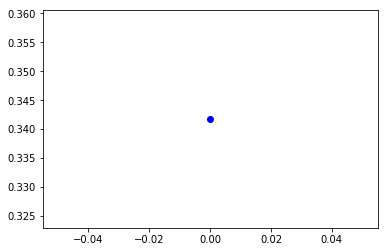

In [8]:
plt.figure()

# start the session
with tf.Session() as sess:
#    initialize the variables
   sess.run(init_op)
   for epoch in range(epochs):
        x_batch = x_train[epoch].reshape(1,1)
#         c = sess.run(optimiser, feed_dict={x0:np.zeros((10,1))})#{x0: x_batch})
        sess.run(optimizer, feed_dict={x0: x_batch})
        _,cost, u1 = sess.run([optimizer, wits_cost, u1], feed_dict={x0: x_batch})
#         print("Epoch:", (epoch + 1), "cost =", "{:.3f}")
#         print(u1)
        print("Cost: ",cost)
        plt.plot(epoch, cost, 'bo')
    
plt.show()

## Variable Learning Rates

In [2]:
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/Users/akhiljalan/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
k = tf.constant(0.2)
x0 = tf.placeholder(tf.float32, [None, 1])

# now declare the weights connecting the input to the hidden layer
W1 = tf.Variable(tf.random_normal([1, 150], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([150]), name='b1')
# and the weights connecting the hidden layer to the u1 output layer
W2 = tf.Variable(tf.random_normal([150, 1], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([1]), name='b2')

#how to specify shape without weight initialization?
# declare weights connecting x1+z to a hidden layer
xavier_init = tf.glorot_uniform_initializer()

W3 = tf.Variable(xavier_init([1, 150]), name='W3') #todo dense layer init
b3 = tf.Variable(initial_value=tf.zeros([150]), name='b3')
# and the weights connecting the hidden layer to the u1 output layer
W4 = tf.Variable(xavier_init([150, 1]), expected_shape=[150, 1], name='W4')
b4 = tf.Variable(initial_value=tf.zeros([150]), name='b4')

In [12]:
#Encoder

# calculate the output of the hidden layer
hidden_out_1 = tf.add(tf.matmul(x0, W1), b1)
hidden_out_1 = tf.nn.tanh(hidden_out_1)

# # output layer
u1 = tf.identity(tf.add(tf.matmul(hidden_out_1, W2), b2))
# print(u1.get_shape())
# x1 = u1 + x0
x1 = u1 + x0

#Decoder
# add noise to x1
z = tf.random_normal([1,1])
x1_noise = x1 + z

hidden_out_2 = tf.nn.sigmoid(tf.add(tf.matmul(x1_noise, W3), b3))
u2 = tf.identity(tf.add(tf.matmul(hidden_out_2, W4), b4))

x2 = x1 - u2

u1_cost = tf.pow(tf.multiply(k, tf.norm(u1, axis=1)), 2)
x2_cost = tf.pow(tf.norm(x2,axis=1),2)
wits_cost = tf.add(u1_cost, x2_cost)

In [13]:
#goal: set a much lower learning rate for the encoder than the decoder, given that we've learned 
#a step function from the encoder. 
encoder_vars = [W1, b1, W2, b2]
decoder_vars = [W3, b3, W4, b4]
encoder_opt = tf.train.GradientDescentOptimizer(learning_rate = 1e-5) #adam? 
decoder_opt = tf.train.GradientDescentOptimizer(learning_rate = 5e-11)

grads = tf.gradients(wits_cost, encoder_vars + decoder_vars)
grads1 = grads[:len(encoder_vars)]
grads2 = grads[len(encoder_vars):]

train_op1 = encoder_opt.apply_gradients(zip(grads1, encoder_vars))
train_op2 = decoder_opt.apply_gradients(zip(grads2, decoder_vars))
train_op = tf.group(train_op1, train_op2)

In [14]:
x_test = np.random.normal(size=20000)

In [15]:
all_u1 = []
all_x2 = []
train_cost = []
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for epoch in range(8000): 
        x_batch = x_test[epoch].reshape(1,1)
        sess.run([train_op], feed_dict={x0: x_test[epoch].reshape(1,1)})
        opt, cost, u1_temp, x2_temp = sess.run([train_op, wits_cost, u1, x2], feed_dict={x0: x_test[epoch].reshape(1,1)})
        all_u1.append(u1_temp[0][0])
        all_x2.append(x2_temp[0][0])
        if epoch % 500 == 0: 
            print('Epoch {}, Cost {}'.format(epoch, cost[0]))
            train_cost.append(cost[0])

Epoch 0, Cost 274.82275390625
Epoch 500, Cost 5.017780780792236
Epoch 1000, Cost 0.49692609906196594
Epoch 1500, Cost 0.005042762495577335
Epoch 2000, Cost 1.1623682975769043
Epoch 2500, Cost 1.4399391412734985
Epoch 3000, Cost 0.011470602825284004
Epoch 3500, Cost 0.36573320627212524
Epoch 4000, Cost 0.01905842125415802
Epoch 4500, Cost 0.3335513174533844
Epoch 5000, Cost 0.5822831392288208
Epoch 5500, Cost 1.787076711654663
Epoch 6000, Cost 0.23037709295749664
Epoch 6500, Cost 0.08344702422618866
Epoch 7000, Cost 0.04122128337621689
Epoch 7500, Cost 0.11297611892223358


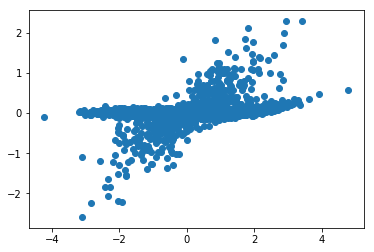

In [16]:
plt.scatter(x_train[:8000], all_x2)

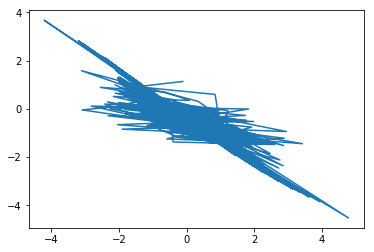

In [19]:

plt.scatter(x_train[:8000], all_u1)

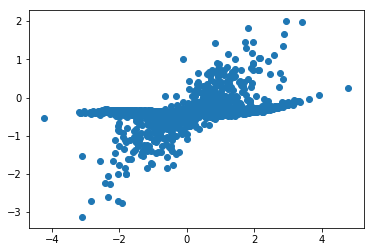

In [18]:
plt.scatter(x_train[:8000], all_u1 + x_train[:8000])